In [4]:
#Code from https://github.com/DOsinga/deep_learning_cookbook/blob/master/03.1%20Using%20pre%20trained%20word%20embeddings.ipynb

In [5]:
%matplotlib inline

In [6]:
import os
#from keras.utils import get_file
import gensim
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(10, 10)

from sklearn.manifold import TSNE

In [7]:
#MODEL = 'GoogleNews-vectors-negative300.bin'
#path = get_file(MODEL + '.gz', 'https://s3.amazonaws.com/dl4j-distribution/%s.gz' % MODEL)
#print(path)
# https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

In [8]:
# Without the limit it never ends
model_path = 'D:\ML\Files\GoogleNews-vectors-negative300.bin'
model = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True, limit=500000)

In [9]:
model.most_similar(positive=['espresso'])

[('cappuccino', 0.6888186931610107),
 ('mocha', 0.6686208248138428),
 ('coffee', 0.6616826057434082),
 ('latte', 0.6536753177642822),
 ('espressos', 0.6438628435134888),
 ('macchiato', 0.6428250074386597),
 ('brewed_coffee', 0.6234087347984314),
 ('iced_coffee', 0.6213865280151367),
 ('expresso', 0.6108267307281494),
 ('coffees', 0.6038862466812134)]

In [10]:
def A_is_to_B_as_C_is_to(a, b, c, topn=1):
    a, b, c = map(lambda x:x if type(x) == list else [x], (a, b, c))
    res = model.most_similar(positive=b + c, negative=a, topn=topn)
    if len(res):
        if topn == 1:
            return res[0][0]
        return [x[0] for x in res]
    return None

A_is_to_B_as_C_is_to('man', 'woman', 'king', 3)

['queen', 'monarch', 'princess']

In [11]:
for country in 'Italy', 'France', 'India', 'China', 'Greece':
    print('%s is the capital of %s' % 
          (A_is_to_B_as_C_is_to('Germany', 'Berlin', country), country))

Rome is the capital of Italy
Paris is the capital of France
Delhi is the capital of India
Beijing is the capital of China
Athens is the capital of Greece


In [12]:
for company in 'Google', 'IBM', 'Boeing', 'Microsoft', 'Samsung', 'Loreal':
    products = A_is_to_B_as_C_is_to(
        ['Starbucks', 'Apple'], 
        ['Starbucks_coffee', 'iPhone'], 
        company, topn=3)
    print('%s -> %s' % 
          (company, ', '.join(products)))

Google -> app, Gmail, Android
IBM -> DB2, WebSphere_Portal, Websphere
Boeing -> Dreamliner, airframe, aircraft
Microsoft -> Windows_Mobile, Windows, software
Samsung -> handset, Nokia_N##, Omnia_II
Loreal -> Body_Lotion, lotion, Bvlgari


In [13]:
beverages = ['espresso', 'beer', 'vodka', 'wine', 'cola', 'tea']
countries = ['Italy', 'Germany', 'Russia', 'France', 'USA', 'India']
sports = ['soccer', 'handball', 'hockey', 'cycling', 'basketball', 'cricket']

items = beverages + countries + sports
len(items)

18

In [14]:
item_vectors = [(item, model[item]) 
                    for item in items
                    if item in model]
len(item_vectors)

18

In [15]:
vectors = np.asarray([x[1] for x in item_vectors])
lengths = np.linalg.norm(vectors, axis=1)
norm_vectors = (vectors.T / lengths).T

tsne = TSNE(n_components=2, perplexity=10, verbose=2).fit_transform(norm_vectors)

[t-SNE] Computing 17 nearest neighbors...
[t-SNE] Indexed 18 samples in 0.016s...
[t-SNE] Computed neighbors for 18 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 18 / 18
[t-SNE] Mean sigma: 0.581543
[t-SNE] Computed conditional probabilities in 0.008s
[t-SNE] Iteration 50: error = 55.4019508, gradient norm = 0.1374518 (50 iterations in 0.016s)
[t-SNE] Iteration 100: error = 54.7561035, gradient norm = 0.0965874 (50 iterations in 0.024s)
[t-SNE] Iteration 150: error = 54.2330437, gradient norm = 0.2310513 (50 iterations in 0.016s)
[t-SNE] Iteration 200: error = 62.8452072, gradient norm = 0.2600568 (50 iterations in 0.008s)
[t-SNE] Iteration 250: error = 66.7165146, gradient norm = 0.4614967 (50 iterations in 0.016s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.716515
[t-SNE] Iteration 300: error = 0.6853933, gradient norm = 0.0008701 (50 iterations in 0.024s)
[t-SNE] Iteration 350: error = 0.4455656, gradient norm = 0.0007768 (50 i

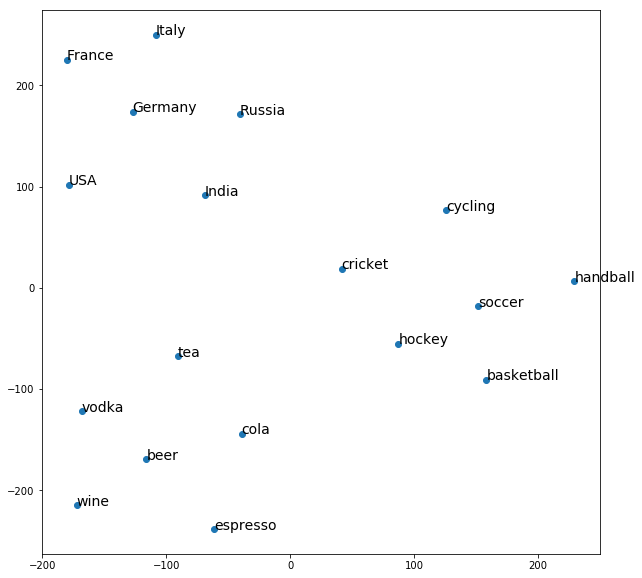

In [16]:
x=tsne[:,0]
y=tsne[:,1]

fig, ax = plt.subplots()
ax.scatter(x, y)

for item, x1, y1 in zip(item_vectors, x, y):
    ax.annotate(item[0], (x1, y1), size=14)

plt.show()

In [17]:
# Find Entity Classes in Embeddings

In [18]:
model.most_similar(positive=['Germany'])

[('Austria', 0.7461062669754028),
 ('German', 0.7178750038146973),
 ('Germans', 0.6628648042678833),
 ('Switzerland', 0.6506868004798889),
 ('Hungary', 0.6504982709884644),
 ('Netherlands', 0.6437495946884155),
 ('Cologne', 0.6430779695510864),
 ('Poland', 0.6326087713241577),
 ('Berlin', 0.6313546895980835),
 ('Europe', 0.6301708221435547)]

In [19]:
# How are we going to find only countries? 
#The concept of country in the embedding space is a shape, not a point so we need a classifier 

In [20]:
import csv
import random
from sklearn import svm

In [21]:
countries = list(csv.DictReader(open('data/countries.csv')))
countries[:10]

[{'cc': 'ca', 'cc3': 'can', 'name': 'Canada'},
 {'cc': 'tm', 'cc3': 'tkm', 'name': 'Turkmenistan'},
 {'cc': 'et', 'cc3': 'eth', 'name': 'Ethiopia'},
 {'cc': 'sz', 'cc3': 'swz', 'name': 'Swaziland'},
 {'cc': 'cz', 'cc3': 'cze', 'name': 'Czech_Republic'},
 {'cc': 'cm', 'cc3': 'cmr', 'name': 'Cameroon'},
 {'cc': 'ae', 'cc3': 'are', 'name': 'UAE'},
 {'cc': 'lr', 'cc3': 'lbr', 'name': 'Liberia'},
 {'cc': 'nl', 'cc3': 'nld', 'name': 'Netherlands'},
 {'cc': 'tl', 'cc3': 'tls', 'name': 'East_Timor'}]

In [22]:
positive = [x['name'] for x in random.sample(countries, 40)]
negative = random.sample(model.vocab.keys(), 5000)
negative[:4]

['wishy_washy', 'Swipe', 'Chagrin_River', 'Telecommunications_Carriers']

In [23]:
labelled = [(p, 1) for p in positive] + [(n, 0) for n in negative]
random.shuffle(labelled)
X = np.asarray([model[w] for w, l in labelled])
y = np.asarray([l for w, l in labelled])
X.shape, y.shape

((5040, 300), (5040,))

In [24]:
TRAINING_FRACTION = 0.3
cut_off = int(TRAINING_FRACTION * len(labelled))
clf = svm.SVC(kernel='linear')
clf.fit(X[:cut_off], y[:cut_off])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
res = clf.predict(X[cut_off:])

missed = [country for (pred, truth, country) in 
 zip(res, y[cut_off:], labelled[cut_off:]) if pred != truth]

100 - 100 * float(len(missed)) / len(res), missed

(99.65986394557824,
 [('Djibouti', 1),
  ('Chad', 1),
  ('Western_Sahara', 1),
  ('Guinea', 1),
  ('Papua', 1),
  ('Myanmar_Burma', 0),
  ('New_Zeland', 0),
  ('Sweden', 0),
  ('Mali', 1),
  ('Mauritius', 1),
  ('Luxembourg', 1),
  ('Timor_Leste', 0)])

In [26]:
all_predictions = clf.predict(model.syn0)

C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


In [27]:
res = []
for word, pred in zip(model.index2word, all_predictions):
    if pred:
        res.append(word)
        if len(res) == 150:
            break
random.sample(res, 10)

['Sudan',
 'Sweden',
 'Germany',
 'Portugal',
 'Mozambique',
 'Venezuela',
 'Peru',
 'Libya',
 'Zambia',
 'Kuwait']

In [28]:
country_to_idx = {country['name']: idx for idx, country in enumerate(countries)}
country_vecs = np.asarray([model[c['name']] for c in countries])
country_vecs.shape

(184, 300)

In [29]:
dists = np.dot(country_vecs, country_vecs[country_to_idx['Canada']])
for idx in reversed(np.argsort(dists)[-10:]):
    print(countries[idx]['name'], dists[idx])

Canada 7.544024
New_Zealand 3.9619699
Finland 3.9392407
Puerto_Rico 3.838145
Jamaica 3.8102932
Sweden 3.8042789
Slovakia 3.703874
Australia 3.671101
Bahamas 3.6240416
United_States 3.5374339


In [30]:
def rank_countries(term, topn=10, field='name'):
    if not term in model:
        return []
    vec = model[term]
    dists = np.dot(country_vecs, vec)
    return [(countries[idx][field], float(dists[idx])) 
            for idx in reversed(np.argsort(dists)[-topn:])]

In [31]:
rank_countries('cricket')

[('Sri_Lanka', 5.92276668548584),
 ('Zimbabwe', 5.336524963378906),
 ('Bangladesh', 5.192489147186279),
 ('Pakistan', 4.948408126831055),
 ('Guyana', 3.9162838459014893),
 ('Barbados', 3.757995128631592),
 ('India', 3.7504398822784424),
 ('South_Africa', 3.6561501026153564),
 ('New_Zealand', 3.642028570175171),
 ('Fiji', 3.608567714691162)]

In [32]:
import geopandas as gpd

In [33]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


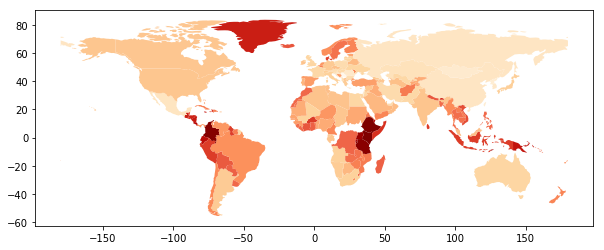

In [35]:
def map_term(term):
    d = {k.upper(): v for k, v in rank_countries(term, topn=0, field='cc3')}
    world[term] = world['iso_a3'].map(d)
    world[term] /= world[term].max()
    world.dropna().plot(term, cmap='OrRd')

map_term('coffee')